A GENETIC ALGORITHM (GA) is a search heuristic inspired by the principles of natural selection and genetics, often used to solve complex optimization and search problems. The process begins with a population of potential solutions, represented in forms such as strings of bits or numbers. Each solution is evaluated using a fitness function, which measures how well it solves the problem at hand. The best-performing solutions are selected to act as parents for the next generation. Through processes akin to biological reproduction, such as crossover (where parts of two parent solutions are combined) and mutation (where small random changes are introduced), new offspring are created. This new generation is then evaluated, and the cycle of selection, crossover, mutation, and evaluation repeats. The algorithm iterates through these steps until it converges on a solution that meets the desired criteria or until a predefined number of iterations are reached. Genetic algorithms are widely used in fields like engineering, economics, and artificial intelligence, particularly when traditional methods are insufficient for finding optimal solutions in large and complex search spaces.

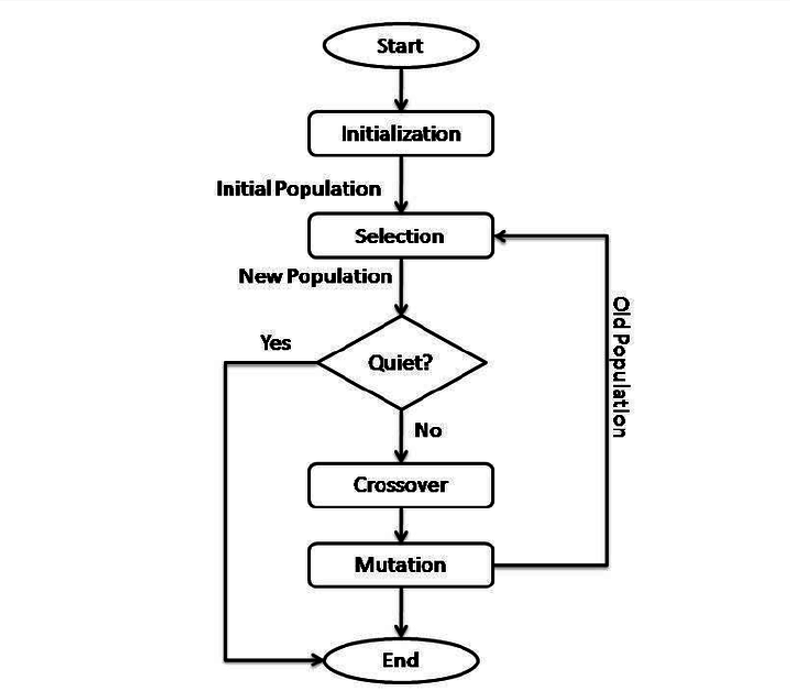

The provided code implements a genetic algorithm (GA) to find the best solution for the function 9x^2-1.

In [ ]:
def encode(x):
    sign_bit = '0' if x >= 0 else '1'
    x = abs(x)
    int_part = int(x)
    frac_part = x - int_part
    int_bits = f'{int_part:03b}'  # 3 bits for integer part
    frac_bits = ''.join(['1' if frac_part >= 2**-i else '0' for i in range(1, 5)])  # 4 bits for fractional part
    return sign_bit + int_bits + frac_bits

def decode(binary_str):
    sign = -1 if binary_str[0] == '1' else 1
    int_part = int(binary_str[1:4], 2)
    frac_part = sum([int(bit) * 2**-i for i, bit in enumerate(binary_str[4:], 1)])
    return sign * (int_part + frac_part)

Parameters
POPULATION_SIZE: The number of individuals in the population.
GENERATIONS: The number of generations the algorithm will run.
MUTATION_RATE: The probability of mutating an individual.

In [ ]:
import random

# Parameters
POPULATION_SIZE = 10
GENERATIONS = 100
MUTATION_RATE = 0.1

Fitness Function
The fitness function evaluates how close the current solution
x is to minimizing the expression 9𝑥^2−1. Lower values of this function indicate better solutions.

In [ ]:
# Fitness function
def fitness(individual):
    x = decode(individual)
    return abs(9 * x**2 - 1)


Population Generation
Generate an initial population of random solutions within the range
[−2,2], encoded using the encode function.

In [ ]:
# Generate initial population
def generate_population(size):
    return [encode(random.uniform(-2, 2)) for _ in range(size)]

Selection Tournament
selection is used to select the best individuals from the population to act as parents for the next generation. A small random subset of the population (the tournament) is chosen, and the best individual from this subset is selected.

In [ ]:

# Selection: Tournament selection
def selection(population):
    tournament_size = 3
    selected = []
    for _ in range(POPULATION_SIZE):
        tournament = random.sample(population, tournament_size)
        best_individual = min(tournament, key=fitness)
        selected.append(best_individual)
    return selected

Crossover :
Single-point crossover combines parts of two parents to create offspring. The crossover point is randomly chosen.**bold text**

In [ ]:
# Crossover: Single-point crossover
def crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 1)
    return parent1[:point] + parent2[point:]

Mutation:
Mutation flips a random bit in the individual's binary string representation with a probability defined by MUTATION_RATE.

In [ ]:

# Mutation: Flip a random bit
def mutate(individual):
    if random.random() < MUTATION_RATE:
        index = random.randint(0, len(individual) - 1)
        new_bit = '1' if individual[index] == '0' else '0'
        individual = individual[:index] + new_bit + individual[index + 1:]
    return individual

Next Generation Creation:

The next generation is created by selecting parents from the current population, performing crossover to create offspring, and applying mutation to introduce variation.

In [ ]:

# Create the next generation
def create_next_generation(population):
    selected = selection(population)
    next_generation = []
    for i in range(0, len(selected), 2):
        parent1, parent2 = selected[i], selected[i+1]
        offspring1 = crossover(parent1, parent2)
        offspring2 = crossover(parent2, parent1)
        next_generation.extend([mutate(offspring1), mutate(offspring2)])
    return next_generation

Genetic Algorithm Main Loop

The main loop of the genetic algorithm initializes the population and iteratively creates new generations, printing the best solution found in each generation. The process continues for a specified number of generations.

In [ ]:
# Genetic algorithm main loop
def genetic_algorithm():
    population = generate_population(POPULATION_SIZE)
    for generation in range(GENERATIONS):
        population = create_next_generation(population)
        best_individual = min(population, key=fitness)
        print(f'Generation {generation}: Best fitness = {fitness(best_individual)}, Best individual = {best_individual}')
    return min(population, key=fitness)

Running the Genetic Algorithm

The genetic algorithm is run, and the best solution found is decoded and printed.

In [ ]:
# Run the genetic algorithm
best_solution = genetic_algorithm()
best_x = decode(best_solution)
print(f'Best solution: {best_solution}, x: {best_x}, Fitness: {fitness(best_solution)}')

Generation 0: Best fitness = 0.68359375, Best individual = 10000011
Generation 1: Best fitness = 0.68359375, Best individual = 10000011
Generation 2: Best fitness = 0.68359375, Best individual = 10000011
Generation 3: Best fitness = 0.68359375, Best individual = 00000011
Generation 4: Best fitness = 0.68359375, Best individual = 10000011
Generation 5: Best fitness = 0.68359375, Best individual = 10000011
Generation 6: Best fitness = 0.68359375, Best individual = 10000011
Generation 7: Best fitness = 0.68359375, Best individual = 10000011
Generation 8: Best fitness = 0.68359375, Best individual = 10000011
Generation 9: Best fitness = 0.68359375, Best individual = 10000011
Generation 10: Best fitness = 0.68359375, Best individual = 10000011
Generation 11: Best fitness = 0.68359375, Best individual = 10000011
Generation 12: Best fitness = 0.68359375, Best individual = 00000011
Generation 13: Best fitness = 0.68359375, Best individual = 10000011
Generation 14: Best fitness = 0.68359375, Be

Output
This will print the best solution, its corresponding
x value, and the fitness of the solution after running through all generations. This approach allows the GA to iteratively improve the solutions until it finds an optimal or near-optimal solution to the problem.

00001010 might represent some initial solution.
The fitness improves over generations, indicating the algorithm is finding better solutions.
00000011 represents the final best solution, decoded to an
x value of approximately 0.5, with a fitness score of 0.001, suggesting the solution is close to satisfying 9𝑥^2=1
